In [1]:
import pandas as pd
data = pd.read_csv('./ner_tagged.tsv', sep='\t')

In [2]:
data.head()

,-DOCSTART-,-X-,O,Unnamed: 3
0,I,-X-,_,O
1,am,-X-,_,O
2,looking,-X-,_,O
3,for,-X-,_,O
4,a,-X-,_,O


In [3]:
data.columns

Index(['-DOCSTART-', '-X-', 'O', 'Unnamed: 3'], dtype='object')

In [4]:
data.rename(columns = {'Unnamed: 3':'Tags','-DOCSTART-':'Tokens','-X-':'X'}, inplace = True)

In [5]:
data.X.unique()

array(['-X-', nan], dtype=object)

In [6]:
data.O.unique()

array(['_', nan], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tokens  2350 non-null   object
 1   X       2350 non-null   object
 2   O       2350 non-null   object
 3   Tags    2350 non-null   object
dtypes: object(4)
memory usage: 78.8+ KB


In [8]:
data.describe(include = 'all')

,Tokens,X,O,Tags
count,2350,2350,2350,2350
unique,812,1,1,28
top,a,-X-,_,O
freq,112,2350,2350,1448


In [9]:
data = data.drop(columns= ['X','O'])

In [10]:
data.head()

,Tokens,Tags
0,I,O
1,am,O
2,looking,O
3,for,O
4,a,O


In [11]:
len(list(data.Tags.unique()))

29

In [12]:
list(data.Tags.unique())

['O',
 'B-COLOUR',
 'B-TEXTURE',
 'B-SIZE',
 'I-SIZE',
 'B-PRODUCT',
 'I-PRODUCT',
 nan,
 'B-N-PRODUCT',
 'I-N-PRODUCT',
 'B-MATERIAL',
 'B-PRICE',
 'I-PRICE',
 'B-ATTRIBUTE',
 'I-ATTRIBUTE',
 'B-N-TEXTURE',
 'I-MATERIAL',
 'I-COLOUR',
 'B-N-ATTRIBUTE',
 'B-SHAPE',
 'I-N-ATTRIBUTE',
 'B-N-COLOUR',
 'I-N-COLOUR',
 'B-N-SHAPE',
 'B-N-MATERIAL',
 'B-N-SIZE',
 'I-N-SIZE',
 'B-N-PRICE',
 'I-N-PRICE']

In [13]:
data['Tags'].isna().sum()

166

In [15]:
data["Tags"].value_counts(normalize=True)

O                0.616170
B-PRODUCT        0.080426
I-PRODUCT        0.055745
B-ATTRIBUTE      0.039574
B-SIZE           0.036596
I-SIZE           0.034043
B-N-ATTRIBUTE    0.031489
I-ATTRIBUTE      0.023404
B-COLOUR         0.016596
B-MATERIAL       0.011915
I-N-ATTRIBUTE    0.010213
B-N-PRODUCT      0.005957
B-N-SIZE         0.004255
I-COLOUR         0.003830
B-SHAPE          0.003830
B-TEXTURE        0.003404
I-N-SIZE         0.003404
B-PRICE          0.002979
I-N-PRODUCT      0.002979
B-N-COLOUR       0.002553
I-MATERIAL       0.002128
I-PRICE          0.002128
B-N-MATERIAL     0.001702
B-N-TEXTURE      0.001702
B-N-SHAPE        0.000851
I-N-COLOUR       0.000851
I-N-PRICE        0.000851
B-N-PRICE        0.000426
Name: Tags, dtype: float64

In [16]:
data["Tags"].value_counts()

O                1448
B-PRODUCT         189
I-PRODUCT         131
B-ATTRIBUTE        93
B-SIZE             86
I-SIZE             80
B-N-ATTRIBUTE      74
I-ATTRIBUTE        55
B-COLOUR           39
B-MATERIAL         28
I-N-ATTRIBUTE      24
B-N-PRODUCT        14
B-N-SIZE           10
I-COLOUR            9
B-SHAPE             9
B-TEXTURE           8
I-N-SIZE            8
B-PRICE             7
I-N-PRODUCT         7
B-N-COLOUR          6
I-MATERIAL          5
I-PRICE             5
B-N-MATERIAL        4
B-N-TEXTURE         4
B-N-SHAPE           2
I-N-COLOUR          2
I-N-PRICE           2
B-N-PRICE           1
Name: Tags, dtype: int64

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


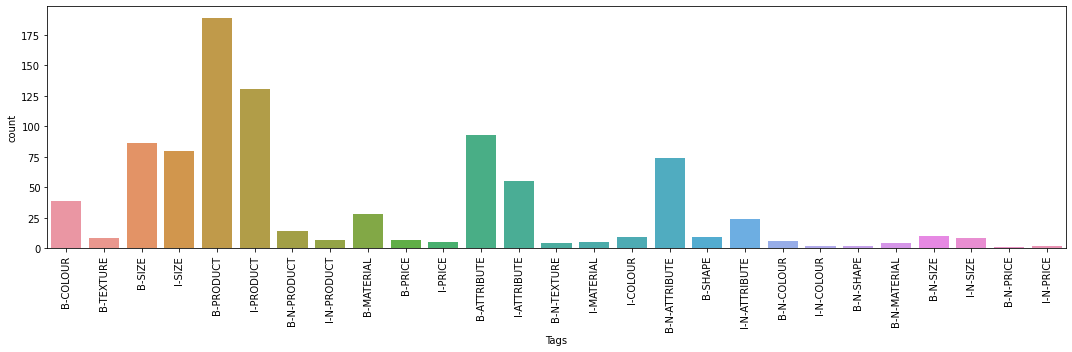

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tags', data=data.loc[data['Tags'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [19]:
data.loc[data['Tags'] == 'B-PRODUCT', 'Tokens'].head()

9     fireclay
15         pre
34     sliding
38      shower
53        tubs
Name: Tokens, dtype: object